In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import matplotlib.ticker as ticker

In [2]:
# Import the dataset
movies_df = pd.read_csv('C:\Jenny Pham\Advanced JRM\My Projects\Python\Movies\movies.csv')

In [3]:
# Drop unnecessary columns 
movies_df.drop(columns = ['imdb_id', 'homepage', 'cast', 'tagline', 'overview', 'budget_adj', 'revenue_adj'], inplace = True)

# Remove rows with missing values in either 'genres' or 'director' columns
movies_df.dropna(how = 'any', subset = ['genres', 'director'], inplace = True)

# Replace missing values (NaN) in the 'production_companies' column with 0
movies_df['production_companies'] = movies_df['production_companies'].fillna(0)

# Replace missing values (NaN) in the 'keywords' column with 0
movies_df['keywords'] = movies_df['keywords'].fillna(0)

# Round the values in the 'popularity' column to 2 decimal places
movies_df['popularity'] = movies_df['popularity'].round(2)

In [4]:
# Insert the 'profit' column at the 3rd position (index 3) in the DataFrame
# Calculate the profit for each movie by subtracting 'budget' from 'revenue'
movies_df.insert(3, 'profit', movies_df.revenue - movies_df.budget)

# Insert the 'ROI' column at the 4th position (index 4) in the DataFrame
# Calculate the Return on Investment (ROI) for each movie by dividing 'profit' by 'budget'
movies_df.insert(4, 'ROI', movies_df.profit / movies_df.budget )

# Round the 'ROI' values to 2 decimal places
movies_df['ROI'] = movies_df['ROI'].round(2)

# Count the occurrences of each unique value in the 'ROI' column
movies_df.ROI.value_counts()

# Identify rows where 'ROI' is not finite
non_infinite_values = ~np.isfinite(movies_df['ROI'])

# Replace infinite values (positive or negative infinity) in the 'ROI' column with NaN
movies_df['ROI'] = movies_df['ROI'].replace([np.inf, -np.inf], np.nan)

In [5]:
# Create a new DataFrame 'df1' with a subset of numeric columns for analysis
df1 = movies_df[['popularity', 'budget', 'revenue', 'profit', 'ROI', 'vote_count', 'vote_average', 'release_year']]

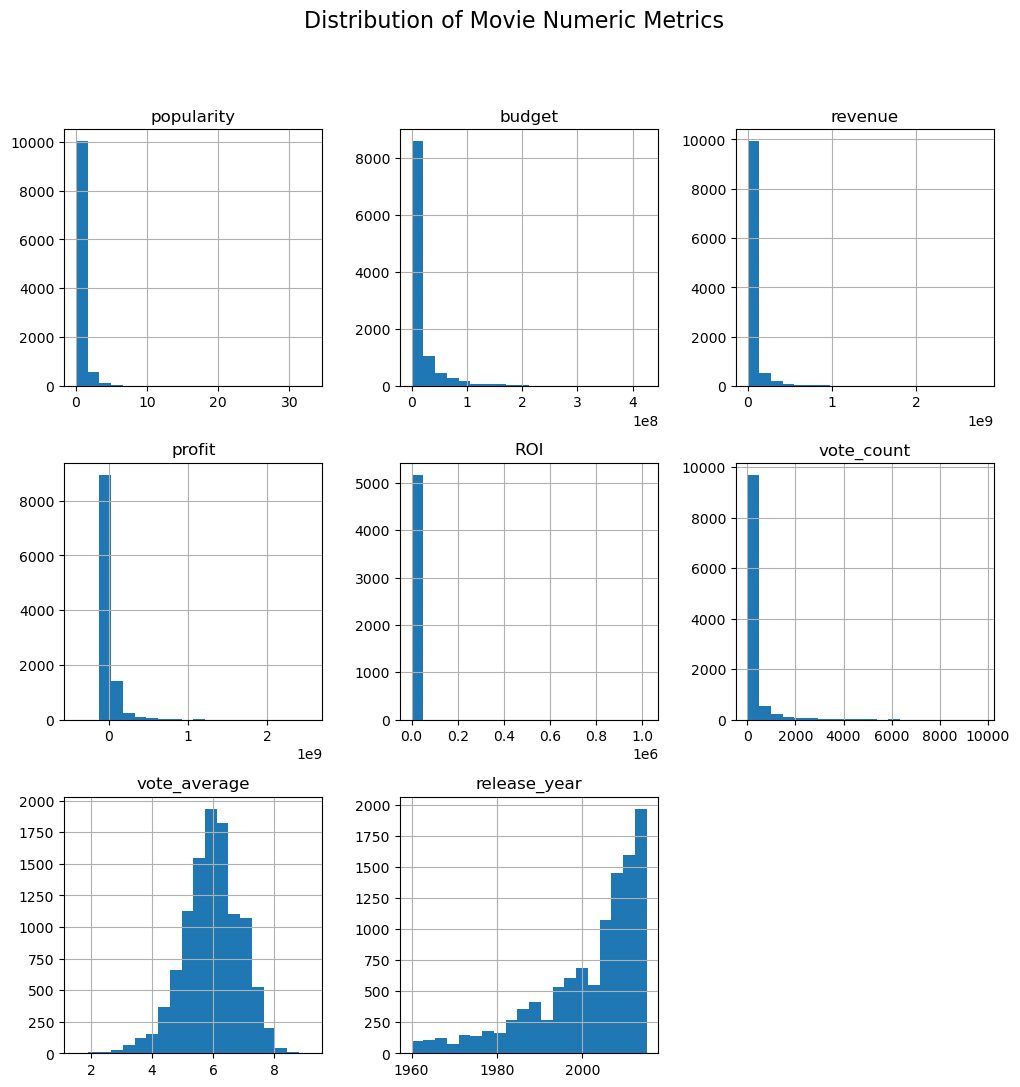

In [6]:
# Plot histograms for each column in 'df1'
df1.hist(bins = 20, figsize = (12,12))

# Add a title for the entire set of histograms
plt.suptitle('Distribution of Movie Numeric Metrics', fontsize = 16)

# Show the plot
plt.show()

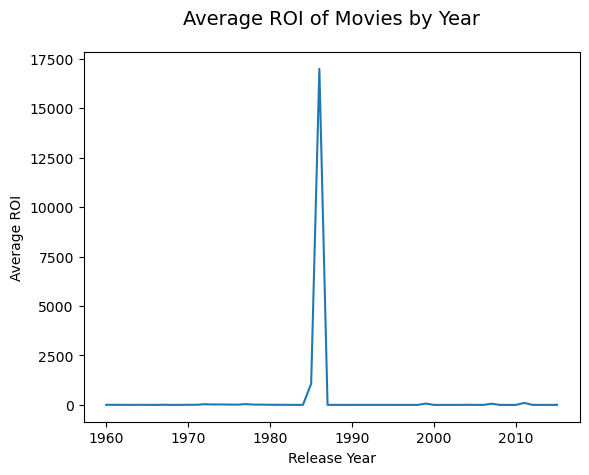

In [7]:
# Group the movies data by 'release_year' and calculate the mean 'ROI' for each year
df2 = movies_df.groupby('release_year')['ROI'].mean()

# Plot the mean 'ROI' over the years as a line chart
df2.plot(kind = 'line')
plt.xlabel('Release Year')
plt.ylabel('Average ROI')

# Add a title for the plot
plt.title('Average ROI of Movies by Year', fontsize = 14, pad = 20)

# Show the plot
plt.show()

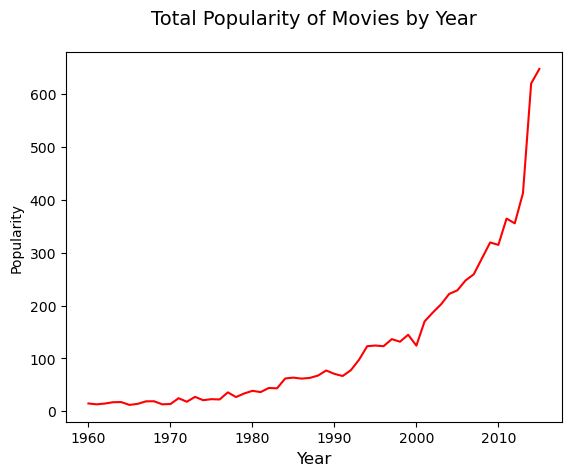

In [8]:
# Group the movies data by 'release_year' and calculate the total popularity for each year
df3 = movies_df.groupby('release_year')['popularity'].sum()

# Plot the total popularity over the years as a line chart with red color
df3.plot(kind = 'line', color = 'red')
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Popularity')

# Add a title for the plot
plt.title('Total Popularity of Movies by Year', fontsize = 14, pad = 20)

# Show the plot
plt.show()

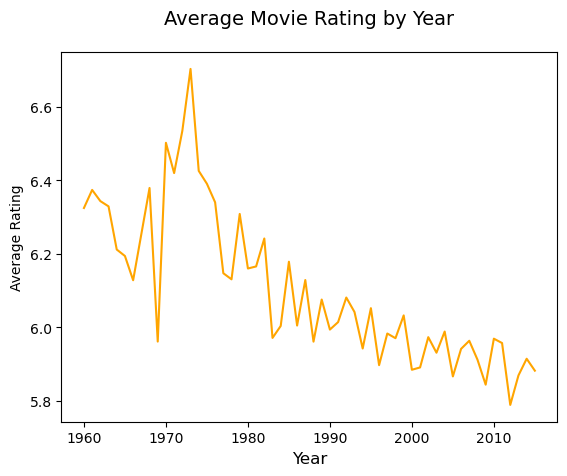

In [9]:
# Group the movies data by 'release_year' and calculate the average 'vote_average' for each year
df4 = movies_df.groupby('release_year')['vote_average'].mean()

# Plot the average 'vote_average' over the years as a line chart
df4.plot(kind = 'line', color = 'orange')
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Average Rating')

# Add a title for the plot
plt.title('Average Movie Rating by Year', fontsize = 14, pad = 20)

# Show the plot
plt.show()

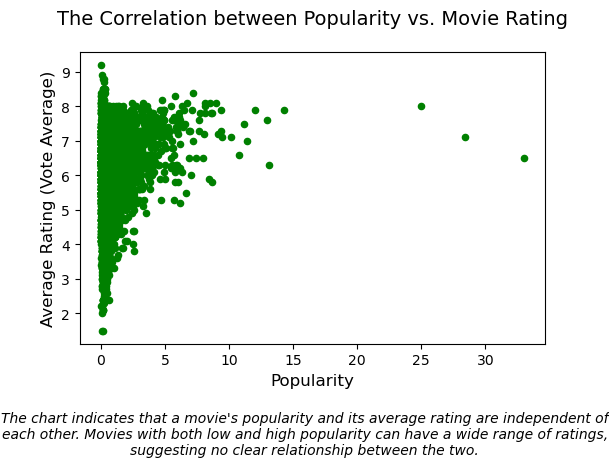

In [10]:
# Create a scatter plot of 'popularity' vs 'vote_average'
df5 = movies_df.plot.scatter(x = 'popularity', y = 'vote_average', c = 'green', figsize = (6,4))

# Add title and axis labels
plt.title('The Correlation between Popularity vs. Movie Rating', fontsize = 14, pad = 20)
plt.xlabel('Popularity', fontsize = 12)
plt.ylabel('Average Rating (Vote Average)', fontsize = 12)

# Add a comment about the relationship between popularity and vote rating
comment = "The chart indicates that a movie's popularity and its average rating are independent of each other. Movies with both low and high popularity can have a wide range of ratings, suggesting no clear relationship between the two."

# Adjust layout to make room for the comment
plt.subplots_adjust(bottom = 0.15) 

# Add the comment below the plot
plt.figtext(0.5, -0.12, comment, horizontalalignment='center', fontsize=10, color='black', style='italic', wrap=True)

# Show the plot
plt.show()


In [11]:
# Define a list of columns to split
split = ['genres']

# Split the string values into lists 
for i in split:
    movies_df[i] = movies_df[i].apply(lambda x: x.split("|"))
movies_df.head(3) 

# Explode the 'genres' column to make each genre in the list becomes a separate row
movies_df = movies_df.explode('genres')


In [12]:
# Sort the results in ascending order to show genres with the lowest total popularity first
df6 = movies_df.groupby('genres')['popularity'].sum().sort_values(ascending=True)

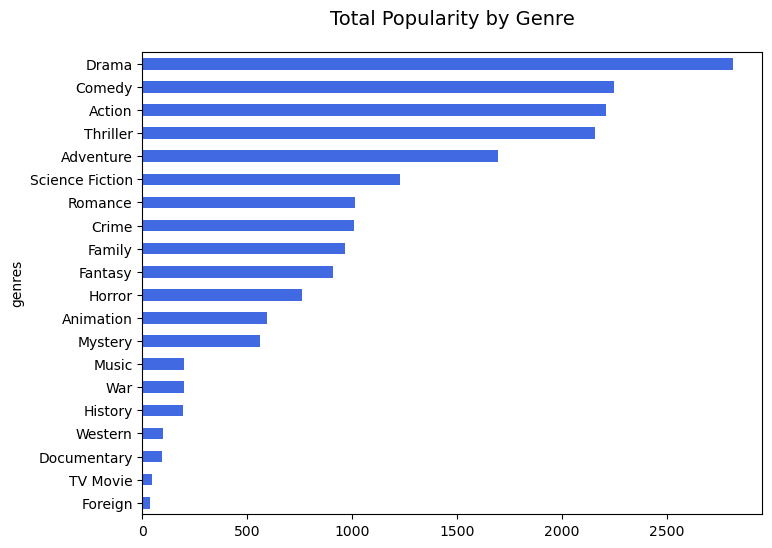

In [13]:
# Create a horizontal bar plot for genres vs. total popularity
df6.plot.barh(x = 'genres', y = 'popularity', color = '#4169E1', figsize = (8,6))

# Add a title to the plot
plt.title('Total Popularity by Genre', fontsize=14, pad=20)

# Show the plot
plt.show()

In [14]:
# Group the DataFrame by the 'id' column
grouped_df = movies_df.groupby('id')

# Aggregate the 'genres' column into a list for each group
combined_df = grouped_df.agg({'genres': list})

# Merge the combined DataFrame with the original DataFrame
merged_df = pd.merge(combined_df, movies_df.drop('genres', axis=1), on='id')

# Drop duplicate rows based on the 'id' column
movies_df = merged_df.drop_duplicates(subset='id', keep='first')


In [15]:
# Convert 'release_date' column to datetime format
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'])

# Extract the month from the 'release_date' and store it in a new column 'extracted_month'
movies_df['extracted_month'] = movies_df['release_date'].dt.month

# Group the data by the extracted month and calculate the total popularity for each month
df7 = movies_df.groupby('extracted_month')['popularity'].sum()

# Create a new DataFrame with extracted months and total popularity values
data = {
    'extracted_month': df7.index,
    'popularity': df7.values
}
df7 = pd.DataFrame(data)

# Map the month numbers (1-12) to month names (Jan-Dec)
index_to_month ={
    1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'
}
df7.extracted_month = df7.extracted_month.map(index_to_month)


C:\Users\X\AppData\Local\Temp\ipykernel_14140\145634765.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  movies_df['release_date'] = pd.to_datetime(movies_df['release_date'])
C:\Users\X\AppData\Local\Temp\ipykernel_14140\145634765.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['release_date'] = pd.to_datetime(movies_df['release_date'])
C:\Users\X\AppData\Local\Temp\ipykernel_14140\145634765.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

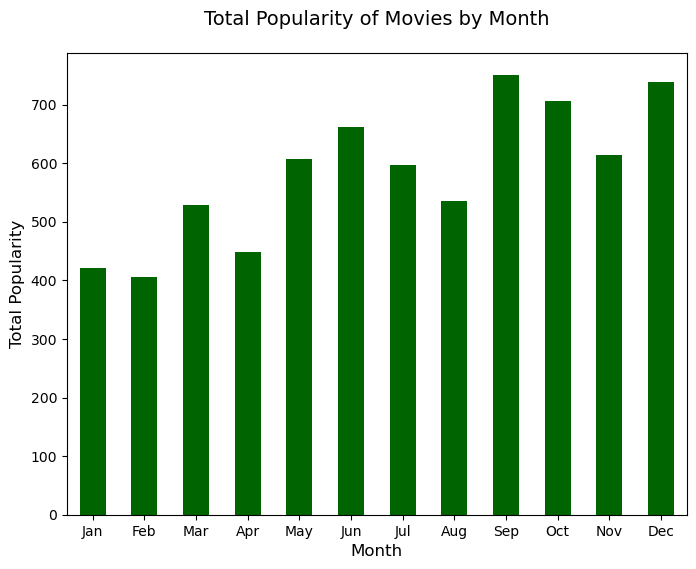

In [16]:
# Plot the data using a bar chart
df7.plot(kind = 'bar', x = 'extracted_month', y = 'popularity', color = 'DarkGreen', figsize = (8, 6), legend=False)

# Add labels and title
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Total Popularity', fontsize = 12)
plt.title('Total Popularity of Movies by Month', fontsize = 14, pad = 20)
plt.xticks(rotation = 0)

# Show the plot
plt.show()

In [17]:
# Group data by extracted month and calculate total revenue per month
df8 = movies_df.groupby('extracted_month')['revenue'].sum()

# Create a DataFrame with extracted months and total revenue values
data = {
    'extracted_month': df8.index,
    'revenue': df8.values
}
df8 = pd.DataFrame(data)
# Map the month numbers (1-12) to month names (Jan-Dec)
index_to_month ={
    1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'
}
df8.extracted_month = df8.extracted_month.map(index_to_month)

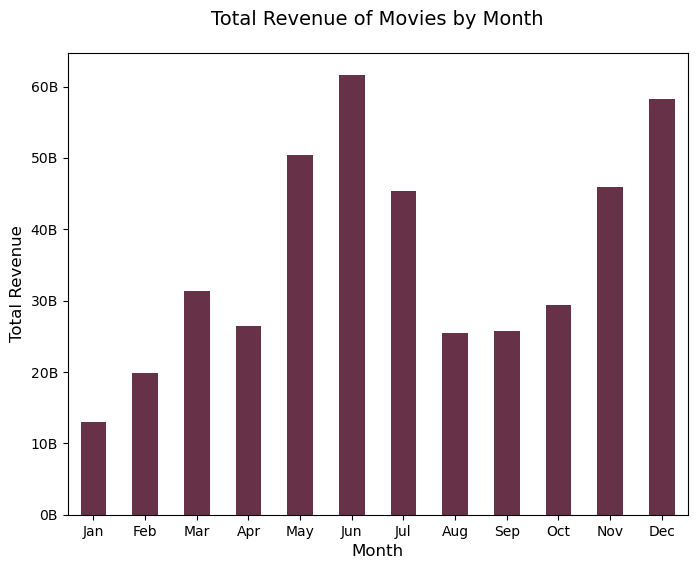

In [18]:
# Plot the data using a bar chart
df8.plot(kind = 'bar', x = 'extracted_month', y = 'revenue', color = '#673147', figsize = (8, 6), legend=False)

# Add labels and title
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Total Revenue', fontsize = 12)
plt.title('Total Revenue of Movies by Month', fontsize = 14, pad = 20)
plt.xticks(rotation = 0)


# Set the y-axis formatter to display values in billions
def billions_formatter(x, pos):
    return f'{int(x/1e9)}B'

# Apply the formatter to the y-axis
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(billions_formatter))

# Show the plot
plt.show()

In [19]:
# Group by and calculate the profit
df9 = movies_df.groupby('original_title')['profit'].sum().sort_values(ascending=False).head(5)


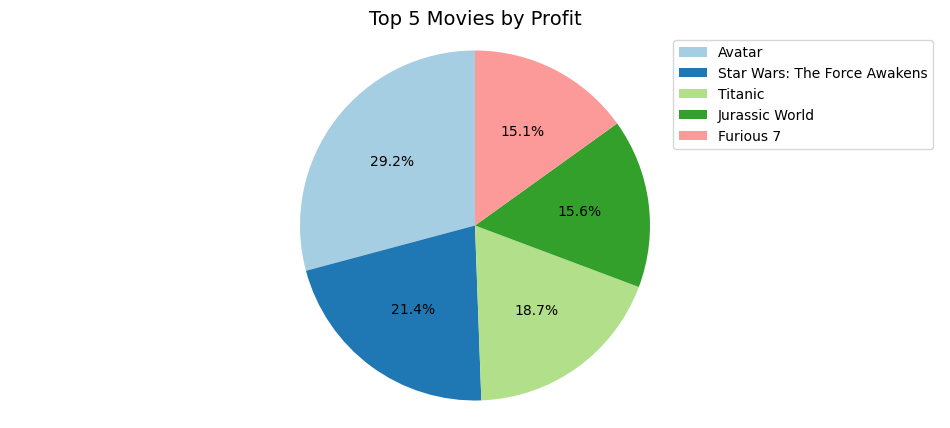

In [20]:
# Plot the pie chart
df9.plot(
    figsize = (12,5),
    kind = 'pie', 
    autopct = '%1.1f%%', 
    startangle = 90, 
    textprops = {'fontsize': 10, 'color': 'black'}, 
    labels = None,
    colors = plt.cm.Paired.colors 
)

# Remove y-axis label
plt.ylabel('')

# Add a legend for labels
plt.legend(labels=df9.index, loc='upper right')

# Ensure the pie chart is a perfect circle
plt.axis('equal')

# Add a title
plt.title('Top 5 Movies by Profit', fontsize=14, color='black')

# Display the chart
plt.show()


In [21]:
# Filter out rows where production_companies is '0'
filtered_movies_df = movies_df[movies_df['production_companies'] != 0]

# Count the top 5 production companies
df10 = filtered_movies_df['production_companies'].value_counts().head(5)

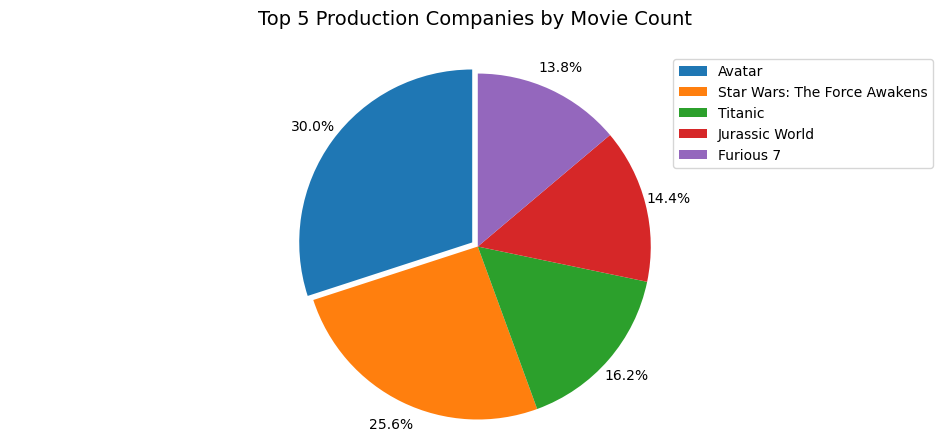

In [22]:
# Define the explode values to emphasize the first slice
explode_list = [0.04,0,0,0,0]

# Plot the pie chart
df10.plot(
    figsize = (12,5),
    kind = 'pie', 
    autopct = '%1.1f%%', 
    startangle = 90, 
    textprops = {'fontsize': 10, 'color': 'black'}, 
    labels = None,
    pctdistance = 1.14,
    explode = explode_list
)

# Remove y-axis label
plt.ylabel('')

# Add a legend for labels
plt.legend(labels=df9.index, loc='upper right')

# Ensure the pie chart is a perfect circle
plt.axis('equal')

# Add a title
plt.title('Top 5 Production Companies by Movie Count', fontsize=14, color='black', pad = 20)

# Display the chart
plt.show()


In [23]:
# Filter out rows where keywords is '0'
filtered = movies_df[movies_df['keywords'] != 0]

# Count the top 15 keywords
top_keywords = filtered['keywords'].value_counts().head(15)

# Create a DataFrame with keywords and their values
df11 = pd.DataFrame({
    'keywords': top_keywords.index,
    'value': top_keywords.values
})

In [24]:
# Create the treemap
fig = px.treemap(df11, path=['keywords'], values='value', title='Top 15 Keywords Treemap')

# Center the title in the middle
fig.update_layout(
    title_x = 0.5, 
    title_y = 0.95  
)
# Show the treemap
fig.show()